## 第五章—Logistic回归

### 1、基于最优化方法的最佳回归系数确定

### 1.1、Logistic回归梯度上升优化算法

In [1]:
import numpy as np
import random

In [2]:
def loadDataSet():                     # 将文本转化为结构化数据
    dataMat = []
    labelMat = []
    fr = open('D:/data/study/AI/ML/MLcode/Ch05/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

$$sigmoid(x)=1/(1 + exp(-x))$$

In [3]:
def sigmoid(inX):
    #if(inX >= 0):
    return 1.0/(1.0 + np.exp(-inX))
    #else:
        #return np.exp(inX)/(1.0 + np.exp(inX))

In [4]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)                                  # 训练集转化为矩阵
    labelMat = np.mat(classLabels).transpose()                      # 标签转化为列向量
    m, n = np.shape(dataMatrix)                                     # m, n分别为数据个数和特征维数
    alpha = 0.001                                                   # 设置学习率
    maxCycles = 500                                                 # 设置最大迭代次数
    weights = np.ones((n, 1))                                       # 权重值初始化为1
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)                           # 输出值     复习numpy矩阵的乘法！！！
        error = (labelMat - h)                                      # 输出误差
        weights = weights + alpha * dataMatrix.transpose() * error  # 此处需要推导！！！
    return weights

In [5]:
dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 1.2、分析数据画出决策边界

In [6]:
# 画出数据集和logistic回归最佳拟合直线的函数
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]             # 数据个数
    xcord1 = [];ycord1 = []
    xcord2 = [];ycord2 = []
    for i in range(n):
        if(int(labelMat[i]) == 1):
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2]) 
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1');plt.ylabel('X2')
    plt.show()

In [7]:
weights = gradAscent(dataArr, labelMat)
plotBestFit(weights.getA())              # getA()

<Figure size 640x480 with 1 Axes>

### 1.3、随机梯度上升

In [8]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)                              # 数据个数，特征数量
    alpha = 0.01
    weights = np.ones(n)                                     # 初始化权重系数
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

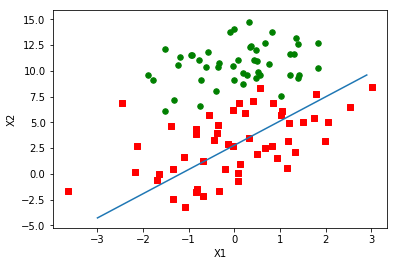

In [9]:
weights = stocGradAscent0(np.array(dataArr), labelMat)
plotBestFit(weights)

In [10]:
# 改进的随机梯度上升算法
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001                           # 学习率随迭代次数和随机样本训练次数增加而减小
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(np.sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

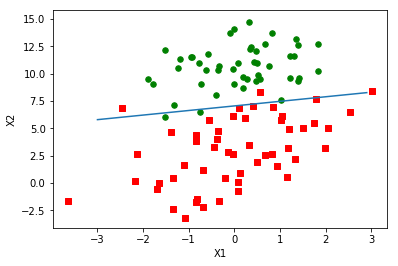

In [11]:
weights = stocGradAscent1(np.array(dataArr), labelMat)
plotBestFit(weights)

### 2、从病症预测病马死亡率

### 2.1、处理数据中的值缺失

**1、可用特征均值填补缺失值**  
**2、特殊值填补缺失值**  
**3、忽略有缺失值的样本**  
**4、使用相似样本的均值填补缺失值**  
**5、使用其他机器学习算法预测缺失值**

### a、缺失值用0填补的原因：
**1、特征值取0不会影响权重系数更新**  
**2、$sigmoid(0)=0.5$ 对结果的预测不具有任何倾向性**
### b、舍弃类别标签缺失的数据

### 2.2、用Logistic回归进行分类

In [12]:
# 分类函数
def classifyVector(inX, weights):
    prob = sigmoid(np.sum(inX * weights))
    if(prob > 0.5): return 1.0
    else: return 0.0

In [13]:
def colicTest():
    frTrain = open('D:/data/study/AI/ML/MLcode/Ch05/horseColicTraining.txt')
    frTest = open('D:/data/study/AI/ML/MLcode/Ch05/horseColicTest.txt')
    # 处理训练样本
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')                                    # 字符串分割
        lineArr =[]
        for i in range(21):                                                    # 前21个特征值逐个放入列表
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)                                            # 将样本特征值列表放入训练集
        trainingLabels.append(float(currLine[21]))                             # 第22个值为标签，将其放入训练集标签列表
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)# 训练样本得到其权重，迭代1000次
    errorCount = 0; numTestVec = 0.0                                           # 定义测试错误的样本数和测试总样本数目
    # 处理测试样本
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if(int(classifyVector(np.array(lineArr), trainWeights))!=int(currLine[21])):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)                                 # 计算预测错误率
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

In [14]:
# 测试10次，计算平均错误率
def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [15]:
multiTest()

d:\software\run\python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


the error rate of this test is: 0.373134
the error rate of this test is: 0.373134
the error rate of this test is: 0.388060
the error rate of this test is: 0.313433
the error rate of this test is: 0.388060
the error rate of this test is: 0.343284
the error rate of this test is: 0.298507
the error rate of this test is: 0.268657
the error rate of this test is: 0.388060
the error rate of this test is: 0.283582
after 10 iterations the average error rate is: 0.341791
